In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
dates = pd.date_range(start='1/1/2010', end='12/31/2020')
temperature = 20 + 10 * np.sin(np.linspace(0, 20*np.pi, len(dates))) + np.random.normal(0, 2, len(dates))
df = pd.DataFrame({'Date': dates, 'Temperature': temperature})
df.set_index('Date', inplace=True)

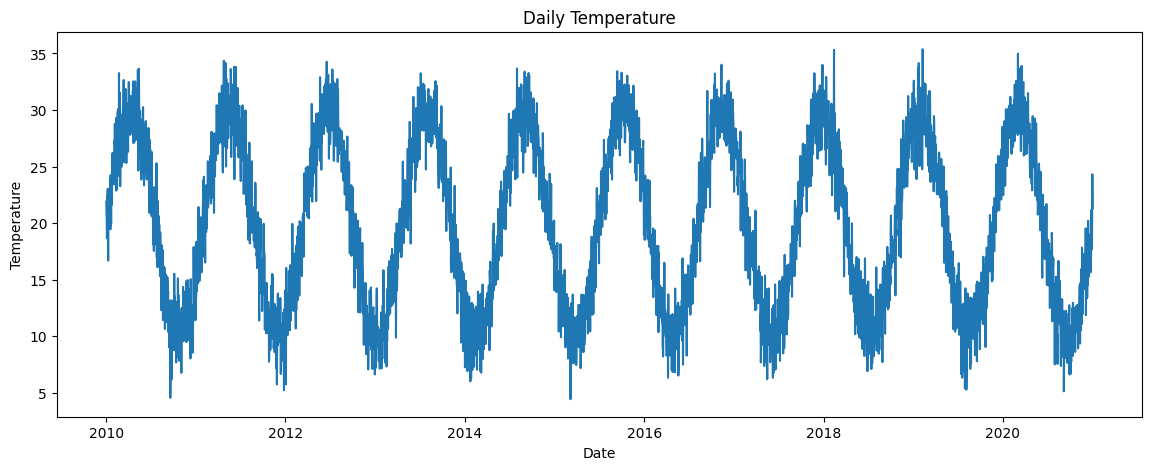

In [3]:
plt.figure(figsize=(14,5))
plt.plot(df['Temperature'])
plt.title('Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [4]:
data = df['Temperature'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [6]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 104ms/step - loss: 0.0171
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0052
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0051
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0051
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 0.0050
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.0049
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 0.0048
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 0.0050
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0050
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - loss: 0.0048
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - loss: 0.0050
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - loss: 0.0047
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 0.0048
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - loss: 0.0047
Epoch 15/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 1

In [9]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step


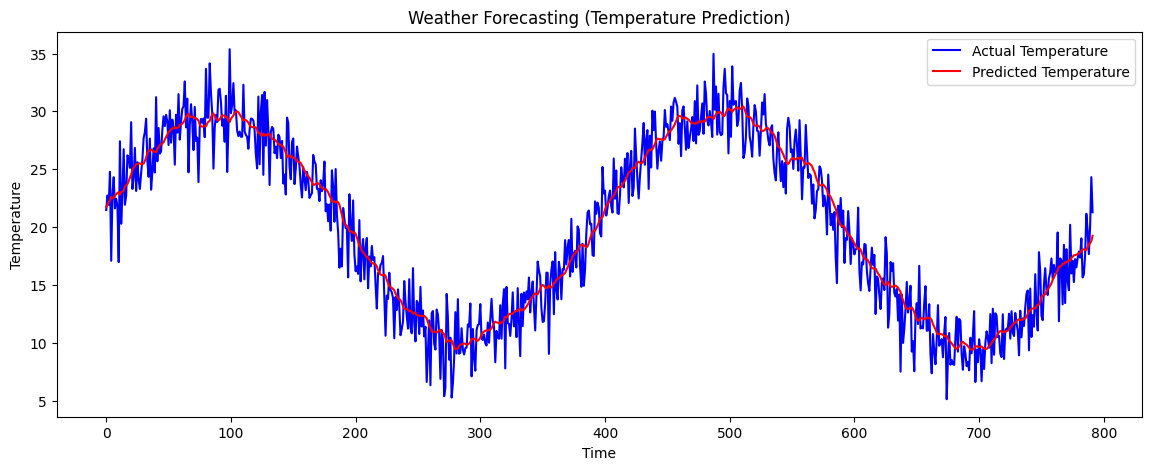

In [10]:
plt.figure(figsize=(14,5))
plt.plot(y_test_scaled, color='blue', label='Actual Temperature')
plt.plot(predictions, color='red', label='Predicted Temperature')
plt.title('Weather Forecasting (Temperature Prediction)')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()